In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [48]:
#Load dataset
df = sns.load_dataset('diamonds')

In [49]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Column x, y and z are the length, width and depth of the diamond. 

In [50]:
# Creating a single column of x, y and z named called volume of diamonds 
df['volume'] = df['x'] * df['y'] * df['z']

In [51]:
df.drop(columns=['x', 'y', 'z'], inplace=True)

In [52]:
# Move 'volume' to the front
cols = ['volume'] + [col for col in df.columns if col != 'volume']
df = df[cols]

df.head()

,volume,carat,cut,color,clarity,depth,table,price
0,38.202030,0.23,Ideal,E,SI2,61.5,55.0,326
1,34.505856,0.21,Premium,E,SI1,59.8,61.0,326
2,38.076885,0.23,Good,E,VS1,56.9,65.0,327
3,46.724580,0.29,Premium,I,VS2,62.4,58.0,334
4,51.917250,0.31,Good,J,SI2,63.3,58.0,335


In [53]:
df.isnull().sum()

volume     0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
dtype: int64

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
volume,53940.0,129.849403,78.245262,0.0,65.13683,114.808572,170.842451,3840.59806
carat,53940.0,0.797940,0.474011,0.2,0.40000,0.700000,1.040000,5.01000
depth,53940.0,61.749405,1.432621,43.0,61.00000,61.800000,62.500000,79.00000
table,53940.0,57.457184,2.234491,43.0,56.00000,57.000000,59.000000,95.00000
price,53940.0,3932.799722,3989.439738,326.0,950.00000,2401.000000,5324.250000,18823.00000


In [55]:
df.corr(numeric_only=True)['price']

volume    0.902385
carat     0.921591
depth    -0.010647
table     0.127134
price     1.000000
Name: price, dtype: float64

In [56]:
df.duplicated().sum()

np.int64(146)

In [57]:
df.drop_duplicates(inplace=True)

In [58]:
X = df.iloc[:, :7]
y = df.iloc[:, -1]

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
df['volume'] = df['volume'].replace(0.0, 0.01)

### Visualization of Before Log Transformation 

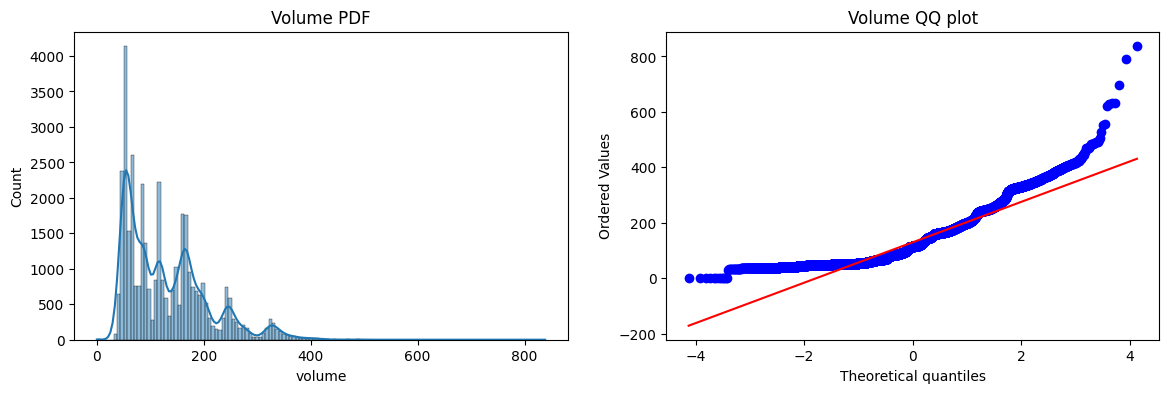

In [63]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.histplot(X_train['volume'], kde=True)
plt.title('Volume PDF')

plt.subplot(122)
stats.probplot(X_train['volume'], dist='norm', plot=plt)
plt.title('Volume QQ plot')
plt.show()

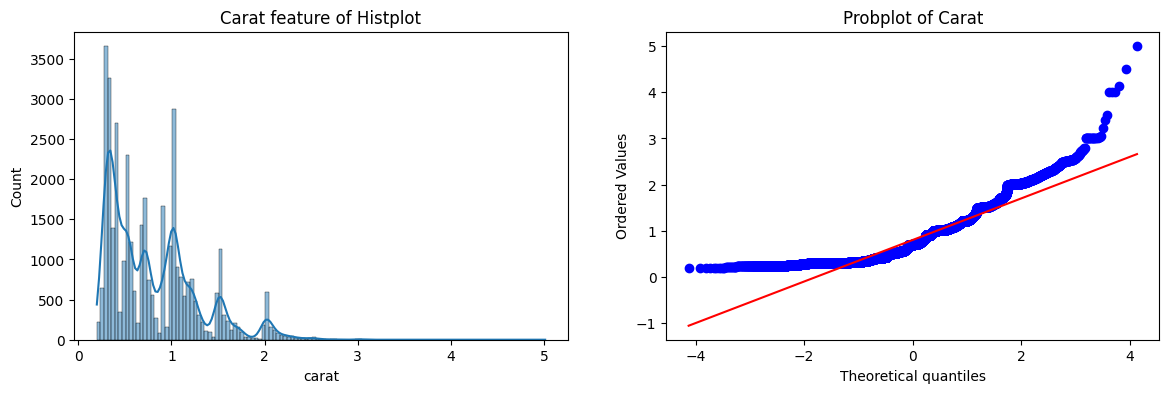

In [64]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.histplot(X_train['carat'], kde=True)
plt.title('Carat feature of Histplot')

plt.subplot(122)
stats.probplot(X_train['carat'], dist='norm', plot=plt)
plt.title('Probplot of Carat')
plt.show()

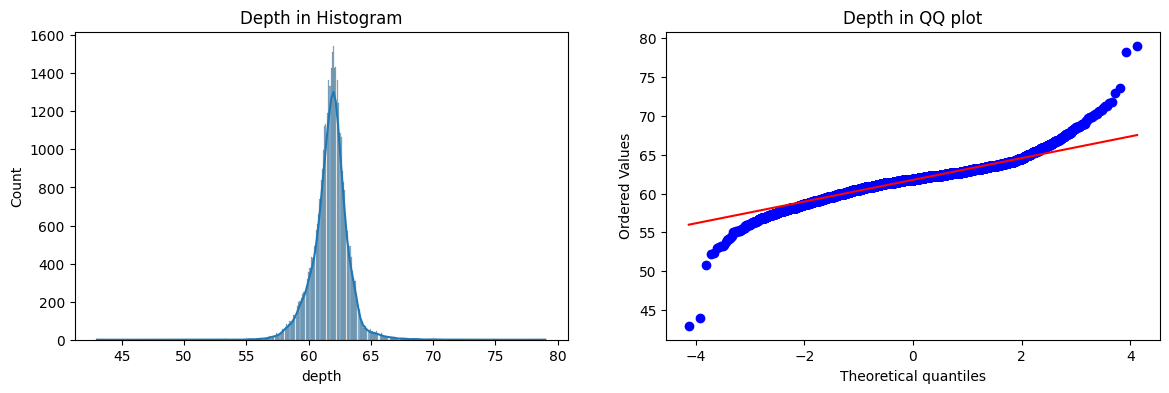

In [65]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.histplot(X_train['depth'], kde=True)
plt.title('Depth in Histogram')

plt.subplot(122)
stats.probplot(X_train['depth'], dist='norm', plot=plt)
plt.title('Depth in QQ plot')
plt.show()

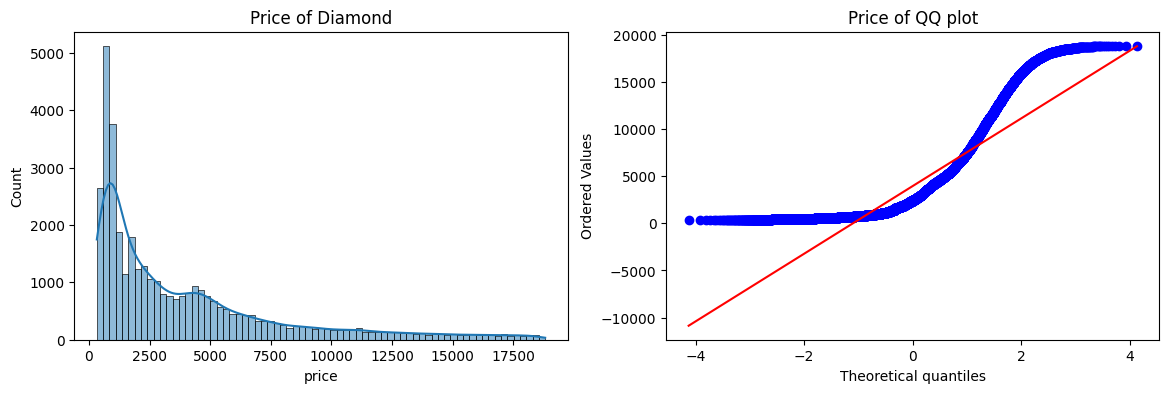

In [66]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.histplot(y_train, kde=True)
plt.title('Price of Diamond')

plt.subplot(122)
stats.probplot(y_train, dist='norm', plot=plt)
plt.title('Price of QQ plot')
plt.show()

In [67]:
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [68]:
cut_categories = ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'] 

clarity_categories = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

nominal_feature = ['D', 'E', 'F', 'G', 'H', 'I', 'J']

log_features = ['volume', 'carat']
scale_only = ['depth', 'table']

In [69]:
df.head()

,volume,carat,cut,color,clarity,depth,table,price
0,38.202030,0.23,Ideal,E,SI2,61.5,55.0,326
1,34.505856,0.21,Premium,E,SI1,59.8,61.0,326
2,38.076885,0.23,Good,E,VS1,56.9,65.0,327
3,46.724580,0.29,Premium,I,VS2,62.4,58.0,334
4,51.917250,0.31,Good,J,SI2,63.3,58.0,335


# Visualization of Before and After Transformation

In [ ]:
ft = FunctionTransformer(np.log1p, validate=False)

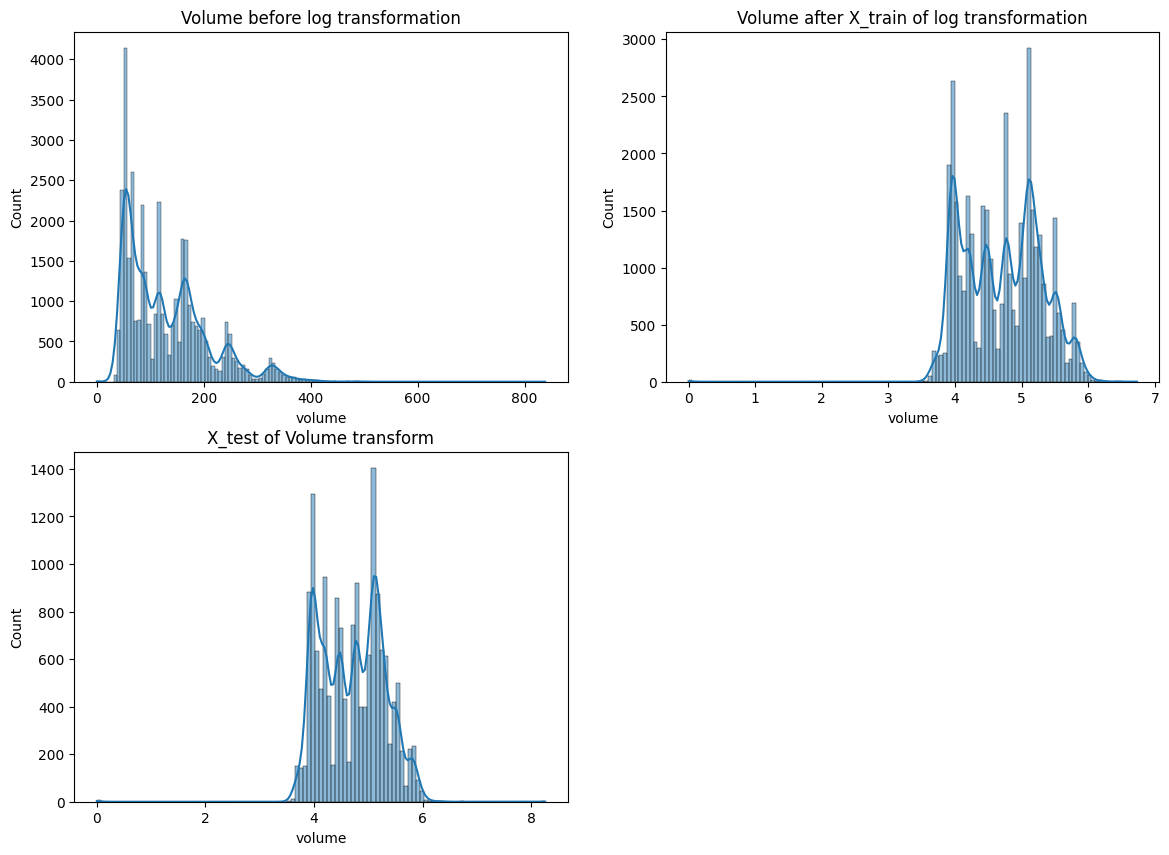

In [80]:

ft_log_trans = ft.fit_transform(X_train['volume'])
ft_test = ft.transform(X_test['volume'])

plt.figure(figsize=(14,10))
plt.subplot(221)
sns.histplot(X_train['volume'], kde=True)
plt.title('Volume before log transformation')

plt.subplot(222)
sns.histplot(ft_log_trans, kde=True)
plt.title('Volume after X_train of log transformation')

plt.subplot(223)
sns.histplot(ft_test, kde=True)
plt.title('X_test of Volume transform')
plt.show()



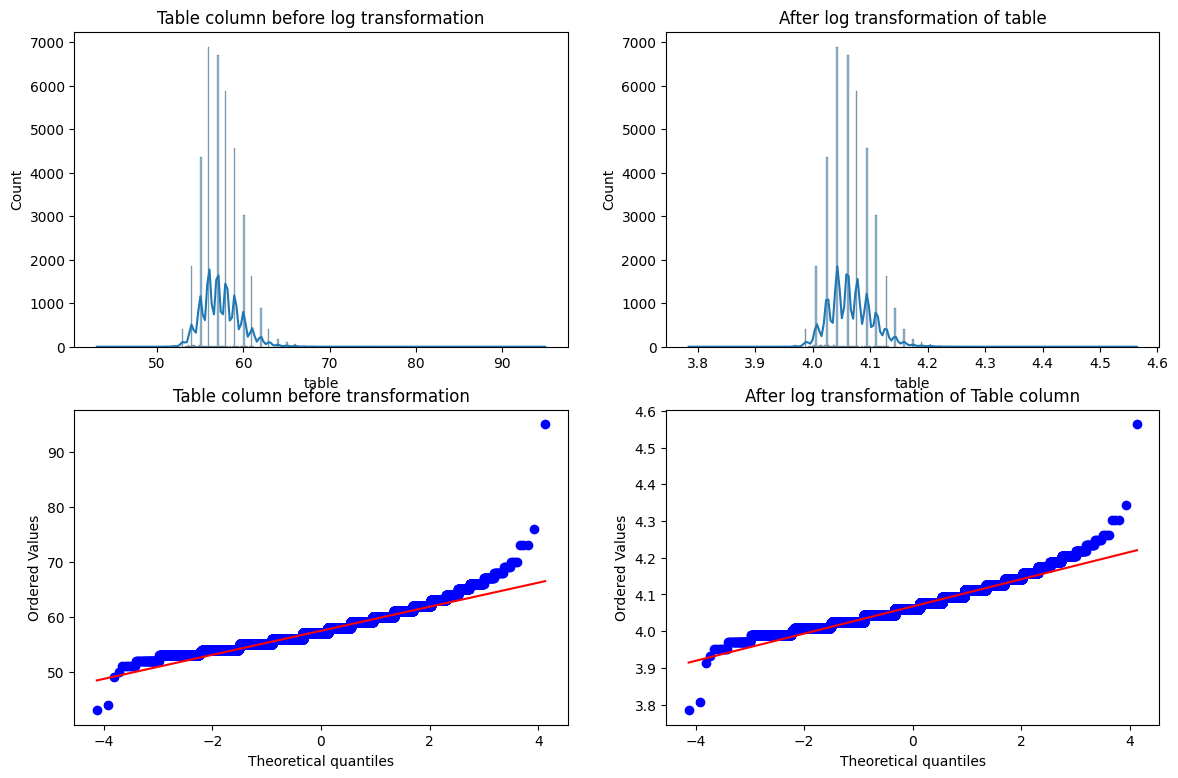

In [90]:
ft_table_train = ft.fit_transform(X_train['table'])
ft_table_test = ft.transform(X_test['table'])

plt.figure(figsize=(14, 9))

plt.subplot(221)
sns.histplot(X_train['table'], kde=True)
plt.title('Table column before log transformation')

plt.subplot(222)
sns.histplot(ft_table_train, kde=True)
plt.title('After log transformation of table')

plt.subplot(223)
stats.probplot(X_train['table'], dist='norm', plot=plt)
plt.title('Table column before transformation')

plt.subplot(224)
stats.probplot(ft_table_train, dist='norm', plot=plt)
plt.title('After log transformation of Table column')

plt.show()

In [45]:
X_train

,volume,carat,cut,color,clarity,depth,table
45307,48.884020,0.30,Ideal,D,SI1,61.7,57.0
15892,164.905066,1.01,Ideal,G,VS2,61.6,56.0
22182,158.519820,1.01,Premium,D,VVS2,62.4,60.0
48310,41.577648,0.25,Ideal,F,VS2,61.6,55.0
32731,50.084034,0.31,Premium,F,VS2,62.3,59.0
...,...,...,...,...,...,...,...
11311,164.854032,1.00,Premium,H,VS2,60.4,58.0
44869,104.963904,0.63,Ideal,G,SI1,61.7,54.0
38271,52.778336,0.32,Ideal,J,SI1,61.8,54.9
860,141.202098,0.90,Premium,J,SI1,62.8,59.0


In [31]:
preprocessor = ColumnTransformer([
    ('ordinal_encoding', OrdinalEncoder(categories=[cut_categories, clarity_categories]), ['cut', 'clarity']),
    ('onehot', OneHotEncoder(categories=[nominal_feature], drop='first'), ['color']),
    ('log_and_scale', Pipeline([
        ('log', FunctionTransformer(np.log1p, validate=False)),
        ('scale', StandardScaler())

    ]), log_features),

    ('scale_only', StandardScaler(), scale_only)
], remainder='passthrough')

In [32]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [33]:
#fit the model
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal_encoding',
                                                  OrdinalEncoder(categories=[['Ideal',
                                                                              'Premium',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Fair'],
                                                                             ['IF',
                                                                              'VVS1',
                                                                              'VVS2',
                                                                              'VS1',
                                                                              'VS2',
                                                                              'SI1',
                                                                              'SI2',
                                                                              'I1']]),
                                                  ['cut', 'clarity']),
                                                 ('onehot',
                                                  OneHotEncoder(categories=[['D',
                                                                             'E',
                                                                             'F',
                                                                             'G',
                                                                             'H',
                                                                             'I',
                                                                             'J']],
                                                                drop='first'),
                                                  ['color']),
                                                 ('log_and_scale',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['volume', 'carat']),
                                                 ('scale_only',
                                                  StandardScaler(),
                                                  ['depth', 'table'])])),
                ('model', LinearRegression())])

In [34]:
y_pred_test = pipe.predict(X_test)
y_pred_train = pipe.predict(X_train)


### Evalution

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

In [202]:
#Test dataset
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2score = r2_score(y_test, y_pred_test)
print('Test data')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2 Score: {r2score:.2f}')

#Train Dataset
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2Score_train = r2_score(y_train, y_pred_train)
print('\nTrain Data')
print(f'MSE: {mse_train:.2f}')
print(f'RMSE: {rmse_train:.2f}')
print(f'R2 Score: {r2Score_train:.2f}')

Test data
MSE: 1780665.88
RMSE: 1334.42
R2 Score: 0.88

Train Data
MSE: 1781321.53
RMSE: 1334.66
R2 Score: 0.89


# Visualizing Train and Test data

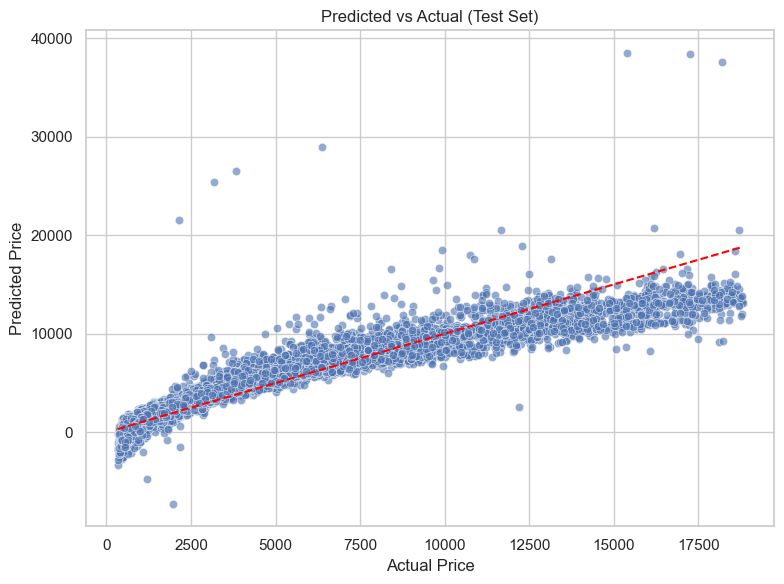

In [203]:
# Set plotting style
sns.set(style="whitegrid")

# 1. Predicted vs Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual (Test Set)")
plt.tight_layout()
plt.show()

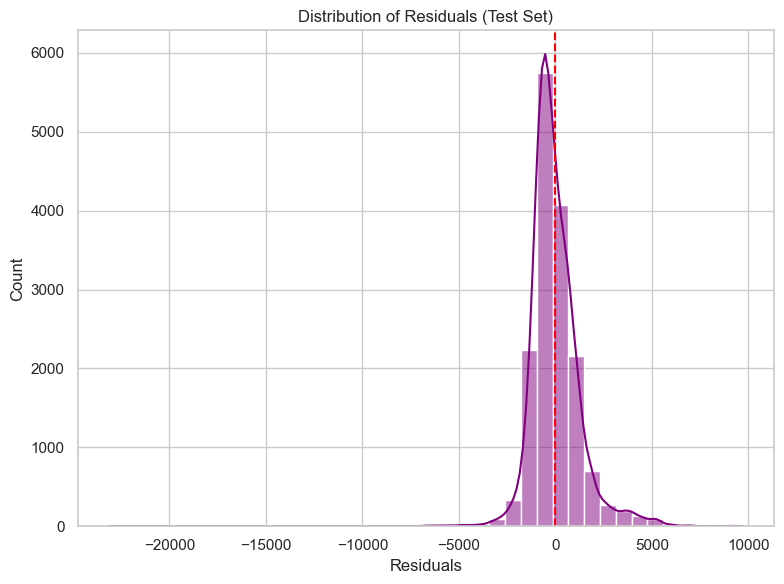

In [204]:
# 2. Residual Plot
residuals = y_test - y_pred_test

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=40, kde=True, color="purple")
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residuals")
plt.title("Distribution of Residuals (Test Set)")
plt.tight_layout()
plt.show()